# Notebook demonstrating some basic querying of CNRA Resources using the Datastore API

## Documentation on the APIs used:

https://docs.ckan.org/en/2.9/api/index.html

## Limits to Queries
The CNRA Open Data platform has a return limit of 50,000 records from a query* (subject to change)

## Get an API Key

How to get a CNRA Open DAta API Key (needed for making advanced SQL Queries).  
    
1. Create an account in CNRA Open Data.  Go here: https://data.cnra.ca.gov/user/login  and click 'Create Account' on lefthand side of window.

2. Once you have an account, you are immediately issued an API Key.  Go to your User page (in the toolbar on the top right, you will see an icon and your initials, click this to go to your user page.  You will find your API key on the lefthand column on your user page.


### IMPORTANT:  For examples 3 and 4 in this notebook to work, you will need to get your own API Key and place it in the cell below, on the line 13 key=\<\<your api key here\>\>  ###

For example, if your api key is '12345678-9abc-def1-2345-67890abcdef1', then line 13 should be changed to:
key='12345678-9abc-def1-2345-67890abcdef1'
    

## 0 Import packages and set up some constants to streamline testing

In [2]:
# Imports
import requests #requests package greatly simplifies http requests in python.  Used for making calls to the CKAN apis.
import json
import pandas as pd
from google.colab import userdata # Needed if you are storing your CNRA Open Data api key in Google user data
import matplotlib.pyplot as plt


#Set up some constants:
#Define CNRA Resource ID for lab results and Stations- to simplify queries below
# Resource IDs are identifiers for tables in the datastore.
resourceLabResults = 'a9e7ef50-54c3-4031-8e44-aa46f3c660fe'
resourceStations = '24fc759a-ff0b-479a-a72a-c91a9384540f'


#API key for authorization -- Needed for more advanced SQL Queries using the API you will need to place your key here:
key='<<your api key here>>'
# and comment out the following line:
key = userdata.get('cnraOpenDataApiKey')

#URL for basic queries -- using datastore_search api command:
urlBasicSearch = 'https://data.cnra.ca.gov/api/3/action/datastore_search'

#URL for advanced SQL queries -- using datastore_search_sql api command:
urlSqlQueries = 'https://data.cnra.ca.gov/api/3/action/datastore_search_sql'



## Example 1: Basic search (datastore_search) -- get first 5 records of a resource

In [3]:
#set up url for basic search for first 5 records of resource, using resource_id and limit parameters
searchUrl = urlBasicSearch + '?resource_id=' + resourceLabResults + '&limit=5' + '&sort="sample_date" '
searchUrl

'https://data.cnra.ca.gov/api/3/action/datastore_search?resource_id=a9e7ef50-54c3-4031-8e44-aa46f3c660fe&limit=5&sort="sample_date" '

In [10]:
# call the api using requests.get
results = requests.get(searchUrl)

#Parse the returned result json to get the results into a dataframe -- lots of ways to do this.  Here is one that works for me.
df = results.content.decode('utf-8')
df = json.loads(df)
resultsList = df['result']['records']
resultsTable = pd.json_normalize(resultsList) # normalize the resulting
resultsTable #display the table


,_id,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,2979900,30785,14N16E13X001S,14N16E13X001S,14N16E13X001S,Groundwater,35.2964,-115.2123,"Public, Review Status Unknown",San Bernardino,WDIS_0824202,1903-03-23T00:00:00,None,Feet,Dissolved Magnesium,50,0.10000000,mg/L,UnkH Magnesium
1,2979901,30785,14N16E13X001S,14N16E13X001S,14N16E13X001S,Groundwater,35.2964,-115.2123,"Public, Review Status Unknown",San Bernardino,WDIS_0824202,1903-03-23T00:00:00,None,Feet,Dissolved Sodium,71,1.00000000,mg/L,UnkH Sodium
2,2979898,30785,14N16E13X001S,14N16E13X001S,14N16E13X001S,Groundwater,35.2964,-115.2123,"Public, Review Status Unknown",San Bernardino,WDIS_0824202,1903-03-23T00:00:00,None,Feet,Dissolved Calcium,134,1.00000000,mg/L,UnkH Calcium
3,2979899,30785,14N16E13X001S,14N16E13X001S,14N16E13X001S,Groundwater,35.2964,-115.2123,"Public, Review Status Unknown",San Bernardino,WDIS_0824202,1903-03-23T00:00:00,None,Feet,Dissolved Chloride,117,0.10000000,mg/L,UnkH Chloride
4,2979902,30785,14N16E13X001S,14N16E13X001S,14N16E13X001S,Groundwater,35.2964,-115.2123,"Public, Review Status Unknown",San Bernardino,WDIS_0824202,1903-03-23T00:00:00,None,Feet,Dissolved Sulfate,208,1.00000000,mg/L,UnkH Sulfate


## Example 2: Basic search (datastore_search) by field value(s)

In [ ]:
searchUrl = (urlBasicSearch + '?resource_id=' + resourceLabResults +
             '&q={"station_number":"KA000331","parameter":"Specific conductance"}&limit=10')
searchUrl

'https://data.cnra.ca.gov/api/3/action/datastore_search?resource_id=a9e7ef50-54c3-4031-8e44-aa46f3c660fe&q={"station_number":"KA000331","parameter":"Specific conductance"}&limit=10'

In [ ]:
#request data from the api and format it
results = requests.get(searchUrl)
df = pd.read_json(results.content)
resultsList=df['result']['records']
resultsTable = pd.json_normalize(resultsList)
resultsTable



,_id,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,...,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name,rank station_number,rank parameter
0,57133,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,...,1999-01-20T08:25:00,1.0,Meters,Specific Conductance,472,1.00000000,uS/cm@25 °C,Std Method 2510 B (Filtered),0.057309,0.090167
1,56873,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,...,2017-01-19T09:00:00,1.0,Meters,Specific Conductance,293,1.00000000,uS/cm@25 °C,Std Method 2510 B (Filtered),0.057309,0.090167
2,54900,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,...,2003-01-15T07:20:00,1.0,Meters,Specific Conductance,307,1.00000000,uS/cm@25 °C,Std Method 2510 B (Filtered),0.057309,0.090167
3,56130,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,...,2006-01-18T08:30:00,1.0,Meters,Specific Conductance,231,1.00000000,uS/cm@25 °C,Std Method 2510 B (Filtered),0.057309,0.090167
4,58192,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,...,2012-02-07T14:00:00,1.0,Meters,Specific Conductance,630,1.00000000,uS/cm@25 °C,Std Method 2510 B (Filtered),0.057309,0.090167
5,61922,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,...,2001-02-21T08:05:00,1.0,Meters,Specific Conductance,466,1.00000000,uS/cm@25 °C,Std Method 2510 B (Filtered),0.057309,0.090167
6,54613,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,...,2020-01-14T08:25:00,1.0,Meters,Specific Conductance,469,1.00000000,uS/cm@25 °C,Std Method 2510 B (Filtered),0.057309,0.090167
7,62195,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,...,2024-02-21T08:25:00,1.0,Meters,Specific Conductance,451,5.00000000,µmhos/cm@25°C,Std Method 2510-B,0.057309,0.090167
8,62581,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,...,2012-03-06T14:55:00,1.0,Meters,Specific Conductance,600,1.00000000,uS/cm@25 °C,Std Method 2510 B (Filtered),0.057309,0.090167
9,57474,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,...,2004-01-21T08:20:00,1.0,Meters,Specific Conductance,292,1.00000000,uS/cm@25 °C,Std Method 2510 B (Filtered),0.057309,0.090167


## Example 3:  Advanced Search (datastore_search_sql)  -- get last 10 'Specific Conductance' results for station KA000331
Note that the parser for the SQL strings as passed as a parameter to the API can be **finicky**.  
Here are some rules of thumb for writing acceptable SQL to pass to the API:  

1. SQL Variant is PostGRES.  Here is a good reference for PostGRES SQL: https://www.postgresql.org/docs/current/sql-syntax-lexical.html.   
2. All table names must be surrounded by double quotes.  Note that table names are the resource Id (e.g. a9e7ef50-54c3-4031-8e44-aa46f3c660fe).  You can alias your tablenames in your sql statement.  
3. String values for instance in a WHERE CLAUSE must be surrounded by single quotes (e.g. WHERE CONDIMENT = **'PICKLES'**
4. Because the SQL statement is a string and also must include both double-quotes (for tables and field names) and single-quotes (for values), you will need to use escape characters when building your SQL statement as a string.  For instance, if you use double quotes to define your SQL string, then you'll need to enclose the table and field names within the string in escaped double quotes (i.e. **\"field_name\"**)

In [ ]:
#create the Sql
strSql = f"SELECT sample_date,result FROM \"{resourceLabResults}\" AS WQ WHERE WQ.station_number LIKE 'KA000331' AND WQ.parameter LIKE 'Specific Conductance' ORDER BY \"sample_date\" DESC LIMIT 400"
requestUrl = urlSqlQueries + '?sql=' + strSql
requestUrl

'https://data.cnra.ca.gov/api/3/action/datastore_search_sql?sql=SELECT sample_date,result FROM "a9e7ef50-54c3-4031-8e44-aa46f3c660fe" AS WQ WHERE WQ.station_number LIKE \'KA000331\' AND WQ.parameter LIKE \'Specific Conductance\' ORDER BY "sample_date" DESC LIMIT 400'

In [ ]:

# create the header with the API key
requestHeaders = {'authorization': key}

#make the api call using requests.get
results = requests.get(url = requestUrl, headers=requestHeaders)

#put contents of results into a pandas dataframe
df = pd.read_json(results.content)

#drill down to the actual records in the resulting object
resultsList=df['result']['records']

#normalize the table
resultsTable = pd.json_normalize(resultsList)

resultsTable = resultsTable.astype({'result':'float'})

#view the table
resultsTable
#type(resultsTable['result'])

,sample_date,result
0,2024-06-18T08:10:00,211.0
1,2024-05-14T07:45:00,275.0
2,2024-04-16T07:30:00,378.0
3,2024-03-19T07:30:00,359.0
4,2024-02-21T08:25:00,451.0
...,...,...
337,1997-12-17T09:50:00,643.0
338,1997-11-19T12:34:00,513.0
339,1997-10-15T12:34:00,518.0
340,1997-09-17T12:00:00,283.0


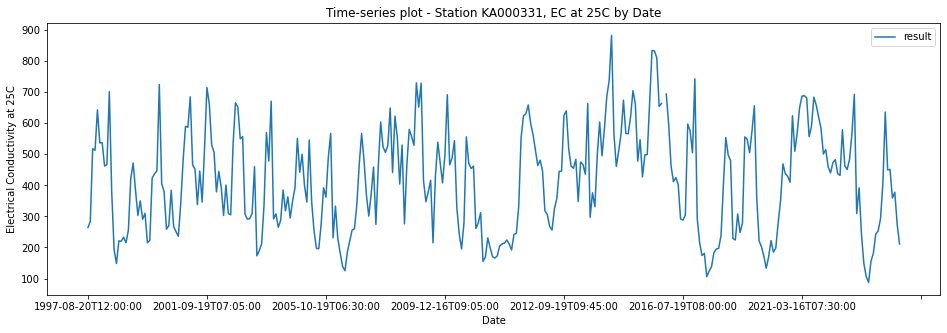

In [ ]:
resultsTable = resultsTable.sort_values('sample_date')
resultsTable.plot('sample_date', 'result', figsize=(16,5))
plt.title('Time-series plot - Station KA000331, EC at 25C by Date')
plt.xlabel('Date')
plt.ylabel('Electrical Conductivity at 25C')
plt.show()

## Example 4a:  Advanced SQL query with a join of two resources - get all Dissolved Organic Carbon results from Yolo County stations since July 1, 2010.
This query joins the Stations table and the Lab Results table, and applies some select criteria on both tables.

In [ ]:
#create the Sql
strSql = f"""SELECT
            ST.\"station_name\",
            ST.\"county_name\",
            WQ.\"sample_date\",
            WQ.\"result\"
            FROM \"{resourceLabResults}\" AS WQ INNER JOIN
            \"{resourceStations}\" as ST ON WQ.\"station_number\" = ST.\"station_number\"
            WHERE ST.\"county_name\" LIKE 'Yolo'
            AND WQ.\"parameter\" LIKE 'Dissolved Organic Carbon'
            AND WQ.\"sample_date\" >  date('2020-07-01')"""
strSql = f"""SELECT ST.\"station_name\",ST.\"county_name\",WQ.\"sample_date\",WQ.\"result\" FROM \"{resourceLabResults}\" AS WQ INNER JOIN \"{resourceStations}\" as ST ON WQ.\"station_number\" = ST.\"station_number\" WHERE ST.\"county_name\" LIKE 'Yolo' AND WQ.\"parameter\" LIKE 'Dissolved Organic Carbon' AND WQ.\"sample_date\" >  date('2020-07-01')"""

strSql = f"""SELECT ST."station_name",ST."county_name",WQ.\"sample_date\",WQ.\"result\" FROM \"{resourceStations}\" ST left join \"{resourceLabResults}\" WQ ON WQ.\"station_number\" = ST.\"station_number\" WHERE ST.\"county_name\" LIKE 'Yolo' AND WQ.parameter LIKE 'Dissolved Organic Carbon' AND WQ.sample_date > '2020-07-01'"""

requestUrl = urlSqlQueries + '?sql=' + strSql
requestUrl

'https://data.cnra.ca.gov/api/3/action/datastore_search_sql?sql=SELECT ST."station_name",ST."county_name",WQ."sample_date",WQ."result" FROM "24fc759a-ff0b-479a-a72a-c91a9384540f" ST left join "a9e7ef50-54c3-4031-8e44-aa46f3c660fe" WQ ON WQ."station_number" = ST."station_number" WHERE ST."county_name" LIKE \'Yolo\' AND WQ.parameter LIKE \'Dissolved Organic Carbon\' AND WQ.sample_date > \'2020-07-01\''

In [ ]:


# create the header with the API key
requestHeaders = {'authorization': key}

#make the api call using requests.get
results = requests.get(url = requestUrl, headers=requestHeaders)
results



<Response [200]>

In [ ]:
#put contents of results into a pandas dataframe
df = pd.read_json(results.content)

#drill down to the actual records in the resulting object
resultsList=df['result']['records']

#normalize the table
resultsTable = pd.json_normalize(resultsList)
resultsTable
#convert results to float (comes in as string)
resultsTable = resultsTable.astype({'result':'float'})

#view the table
resultsTable

,station_name,county_name,sample_date,result
0,SACWSACINT,Yolo,2022-01-05T15:40:00,3.7
1,SACWSACINT,Yolo,2023-01-06T13:30:00,4.1
2,SACWSACINT,Yolo,2023-01-06T13:30:00,4.3
3,SACRAMENTO R BL KNIG,Yolo,2022-02-09T12:45:00,1.5
4,SACRAMENTO R BL KNIG,Yolo,2024-02-14T12:00:00,2.0
...,...,...,...,...
373,Liberty Cut @ USGS,Yolo,2021-06-10T11:48:00,3.3
374,Liberty Cut @ USGS,Yolo,2020-07-14T11:57:00,3.5
375,Liberty Cut @ USGS,Yolo,2021-07-14T11:06:00,3.6
376,Liberty Cut @ USGS,Yolo,2021-07-14T11:06:00,3.7


# Example 4b, Make boxplots of data retrieved in example 4a by station name#

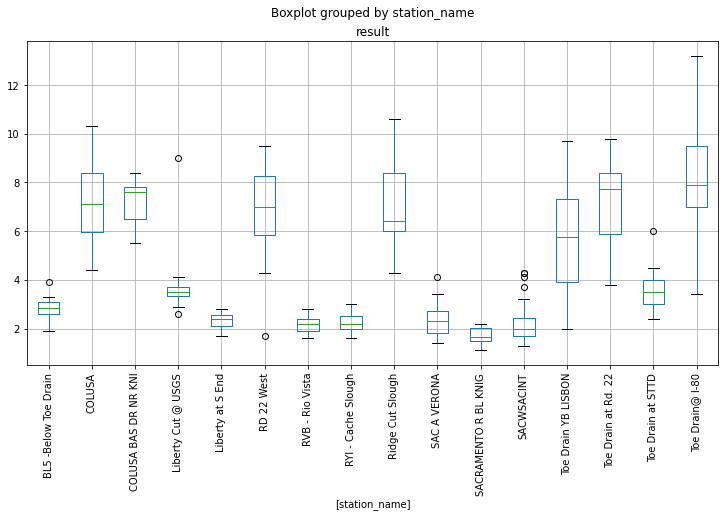

In [ ]:
#Creat a boxplot of results grouped by station
boxplot = resultsTable.boxplot(column=['result'], by=['station_name'], rot=90, fontsize=10, figsize=[12,6])
